![Hosp](https://costar.brightspotcdn.com/da/6e/7491badf4be5b5ca3537ce0e47dd/20220120-designconstruction-californiadevelopmentsurvey.jpg)

### Time Series Forecasting Exercise

This exercise walks through a SARIMA prediction and forecast. The data used in this exercise is about California Hospital Industry Employees.

In [17]:
# Requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load necessary forecasting libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for autoregressive order and lags
from statsmodels.tsa.seasonal import seasonal_decompose # for generating Error, Trend, and Smoothing Plots (ETS)
from pmdarima import auto_arima # for getting ARIMA orders
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load model evaluation tools to understand their performance
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [3]:
df = pd.read_csv('../Data/HospitalityEmployees.csv', index_col = 'Date', parse_dates = True)
df.index.freq = 'MS'

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this data frame.')
print(f'The length of the dataframe is {len(df)}')

There are 348 rows and 1 columns in this data frame.
The length of the dataframe is 348


In [5]:
# Let's look at the first few rows and final few rows of data
print(df.head())
print(df.tail())

            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7
            Employees
Date                 
2018-08-01     2019.1
2018-09-01     1992.5
2018-10-01     1984.3
2018-11-01     1990.1
2018-12-01     2000.2


The employees are in the thousands as the data takes monthly averages. We know the data begins from January 1st, 1990 and ends on December 1st, 2018.

### Exploratory Data Analysis

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Number of Employees (In Thousands)')]

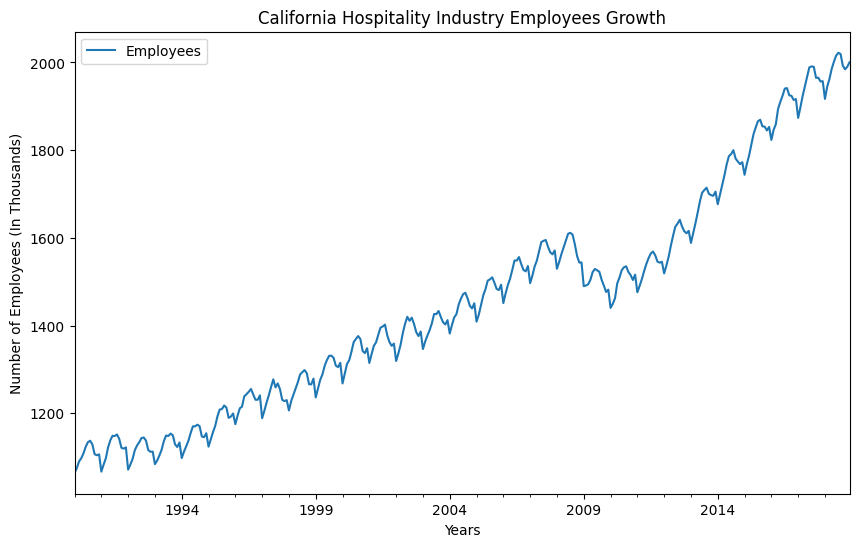

In [9]:
title = 'California Hospitality Industry Employees Growth'
ylabel = 'Number of Employees (In Thousands)'
xlabel = 'Years'
ax = df.plot(figsize = (10, 6), legend = True, title = title);
ax.set(xlabel = xlabel, ylabel = ylabel)
# From an early eye test this data is not seasonal. It shows a clear increasing trend and change in mean over time.

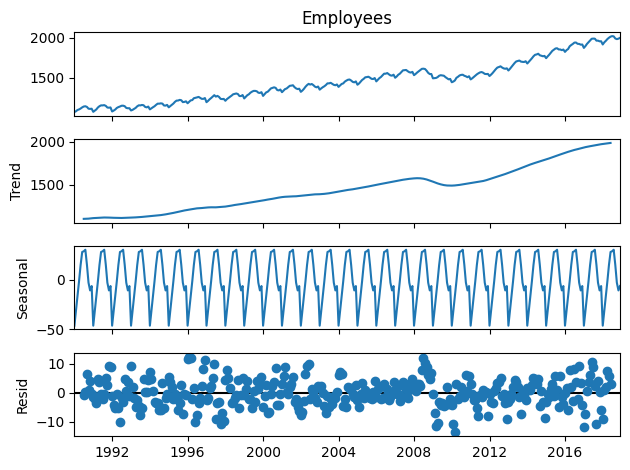

In [11]:
# Let's assess the Error, Trend, and Smoothing of the data.
# Will assess the kind of model to use

result = seasonal_decompose(df['Employees'], model = 'add')
result.plot();

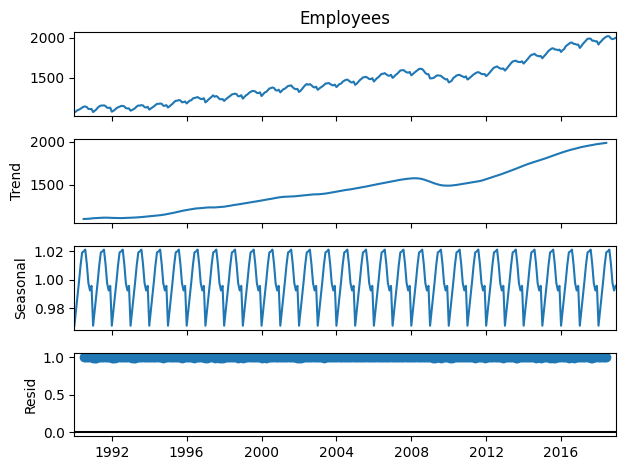

In [12]:
result2 = seasonal_decompose(df['Employees'], model = 'mult')
result2.plot();

### Pyramid ARIMA + auto_arima

Using the pmdarima library I'm calling the auto_arima function to hep select the best order (p, d, q, P, D, Q, and s) for a seasonal ARIMA (SARIMA) model. auto_arima has many benefits and functionalities including:

1. Automated Order Selection: One of the primary features of auto_arima is that it can do an automated search over a range of possible ARIMA model configurations to find the best combination of orders that minimizes a chosen information criterion, such as AIC (Akaike Information Criterion) or BIC (Bayseian Information Criterion). This helps save the effort in manually testing differnet model orders.

2. Seasonal Decomposition: auto_arima can detect and model the seasonality in time series data by estimating the seasonal order (P, D, Q, and s) in addition to the non-seasonal order (p, d, q).

3. Stepwise Search: auto_arima uses a stepwise approach to search for the best model, which 

In [13]:
auto_arima(df['Employees'], seasonal = True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sat, 30 Dec 2023   AIC                           2208.504
Time:                                      14:45:22   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.563      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.470      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.145      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    706.659      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.324      0.000      -0.834      -0.664
sigma2        29.2994      1.717     17.063      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Preparing for Modelling: train/test split

In [14]:
train = df.iloc[:len(df) - 12]
test = df.iloc[len(df) - 12:]

### Fitting SARIMA(1, 1, 2)(1, 0, 1, 12) model to the training set

In [18]:
p, d, q = 1, 1, 2
model = SARIMAX(train['Employees'], order = (p, d, q), seasonal_order = (1, 0, 1, 12))
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05000D+00    |proj g|=  7.42739D+00

At iterate    5    f=  3.81187D+00    |proj g|=  4.90610D-02

At iterate   10    f=  3.28144D+00    |proj g|=  1.18579D-01

At iterate   15    f=  3.17018D+00    |proj g|=  1.50451D-02

At iterate   20    f=  3.15385D+00    |proj g|=  1.91694D-02

At iterate   25    f=  3.15114D+00    |proj g|=  2.95308D-03

At iterate   30    f=  3.14943D+00    |proj g|=  8.47157D-03

At iterate   35    f=  3.14898D+00    |proj g|=  1.57621D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sat, 30 Dec 2023   AIC                           2128.116
Time:                                      14:51:34   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.043     21.265      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.676      0.000      -1.096      -0.821
ma.L2          0.1497      0.061      2.461      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    730.188      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.147      0.000      -0.838      -0.666
sigma2        28.7664      1.684     17.080      0.000      25.465      32.067
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Obtain and Interpret Predicted Values

In [19]:
start = len(train)
end = len(train) + len(test) - 1

In [20]:
# Remember, typ parameter determines whether you want true predicted forecasted values
# and not the differenced values, you specify typ as 'levels' because a differencing term exists 
predictions = results.predict(start, end, typ = 'levels').rename('SARIMA Test Predictions')

### Visualize Predictions

<Axes: xlabel='Date'>

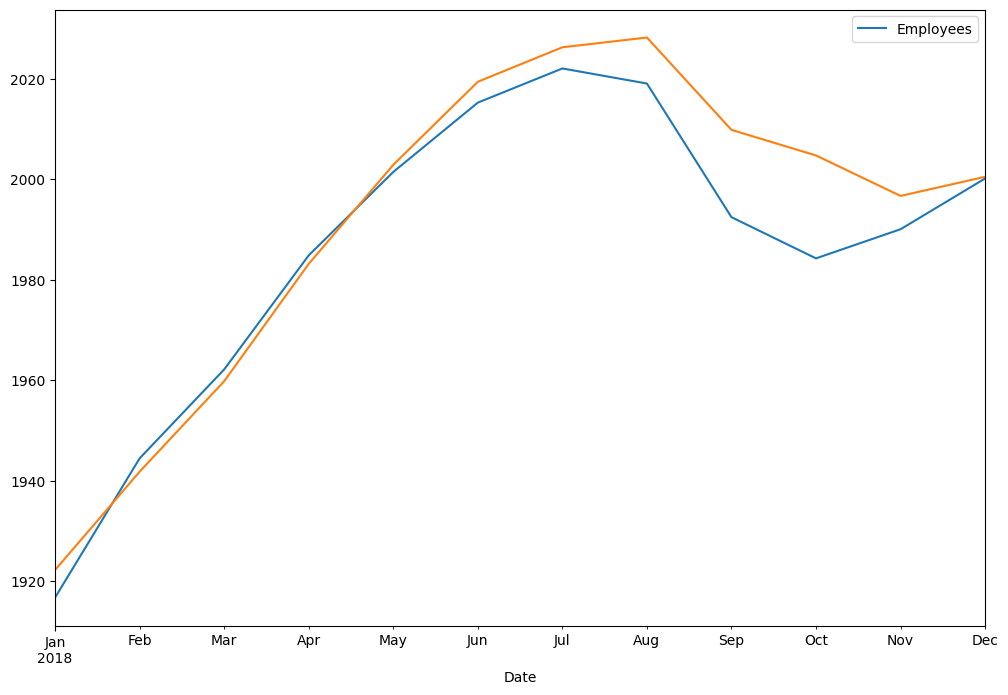

In [21]:
test['Employees'].plot(figsize = (12, 8), legend = True)
predictions.plot()

Early performance is pretty good, tapers off semmingly significantly around July until it converges again in December. This can be better understood using model evaluation methods.

### Model Evaluation Methods

In [27]:
print(f'The Root Mean Squared Error of the model compared to its predictions is {rmse(test["Employees"], predictions)}')

The Root Mean Squared Error of the model compared to its predictions is 8.812234772727656


In [23]:
print(f'The Root Mean Squared Error of the model compared to its predictions is {mean_squared_error(test['Employees'], predictions)}')

77.65548168967045

### Retrain model on data set + Forecasting into Future

In [31]:
p, d, q = 1, 1, 2
model = SARIMAX(train['Employees'], order = (p, d, q), seasonal_order = (1, 0, 1, 12))
results = model.fit()
forecast = results.predict(start = len(df), end = len(df) + 11, typ = 'levels').rename('SARIMA Forecast')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05000D+00    |proj g|=  7.42739D+00

At iterate    5    f=  3.81187D+00    |proj g|=  4.90610D-02

At iterate   10    f=  3.28144D+00    |proj g|=  1.18579D-01

At iterate   15    f=  3.17018D+00    |proj g|=  1.50451D-02

At iterate   20    f=  3.15385D+00    |proj g|=  1.91694D-02

At iterate   25    f=  3.15114D+00    |proj g|=  2.95308D-03

At iterate   30    f=  3.14943D+00    |proj g|=  8.47157D-03

At iterate   35    f=  3.14898D+00    |proj g|=  1.57621D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

### Visualize Forecasted Values

<Axes: xlabel='Date'>

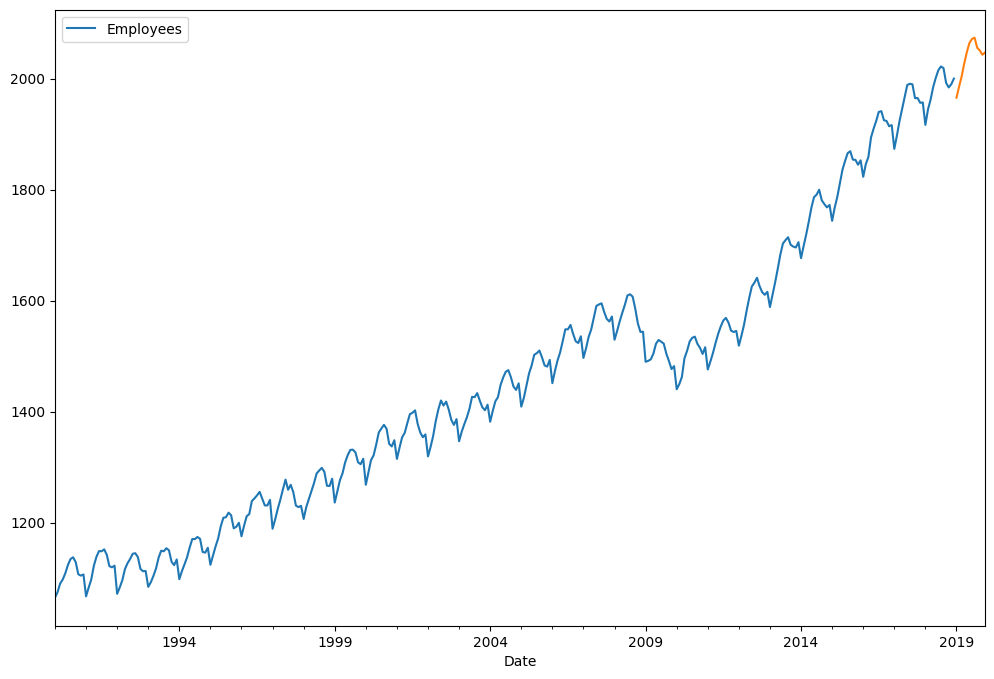

In [33]:
df['Employees'].plot(figsize = (12, 8), legend = True)
forecast.plot()

The forecasts aren't linked because they are separate series. Pandas won't necessarily link them together. To connect them I could put them together in a dataframe.